In [1]:
import pandas as pd
import numpy as np
from firebase import firebase
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('saved_dataframe/df_pure_19_12_20.csv')

In [3]:
    input = 1592671756 + 60 * 60
df.iloc[(df['UnixTime'] - input).abs().argsort()[:10]]

,Humidity,Temperature,UnixTime,Hour,Minute
625,66.0,32.9,1592674430,17,33
624,65.0,32.9,1592674419,17,33
623,65.0,32.9,1592674408,17,33
622,65.0,32.9,1592674397,17,33
621,65.0,32.9,1592674387,17,33
620,66.0,32.9,1592674377,17,32
619,66.0,32.9,1592674366,17,32
618,66.0,32.9,1592674356,17,32
626,76.0,32.4,1592676363,18,6
617,66.0,32.9,1592674345,17,32


In [4]:
df_future = pd.DataFrame(columns = ['Humidity', 'Temperature', 'UnixTime', 'Hour', 'Minute', 
                                          'Humidity_Future', 'Temperature_Future', 'UnixTime_Future', 'Hour_Future', 'Minute_Future'])

In [5]:
threshold = 60 * 60

for i, j in df.iterrows():
    input = j['UnixTime'] + threshold
    feature = df.iloc[(df['UnixTime'] - input).abs().argsort()[:2]]
    selected = feature.iloc[0]
    
    if selected['UnixTime'] == j['UnixTime']:
        break
    
    if abs(selected['UnixTime'] - j['UnixTime'] - threshold) > abs(feature.iloc[1]['UnixTime'] - j['UnixTime'] - threshold):
        selected = feature.iloc[1]
        
    df_future = df_future.append({'Humidity' : j['Humidity'], 
                    'Temperature' : j['Temperature'], 
                    'UnixTime' : j['UnixTime'], 
                    'Hour' : j['Hour'], 
                    'Minute' : j['Minute'], 
                    'Humidity_Future' : selected['Humidity'], 
                    'Temperature_Future' : selected['Temperature'], 
                    'UnixTime_Future' : selected['UnixTime'], 
                    'Hour_Future' : selected['Hour'], 
                    'Minute_Future' : selected['Minute']},  
                   ignore_index = True)
    if i % 1000 == 0:
        print(i)
        
print('done')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
done


In [35]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
# pd.reset_option('display.float_format')

In [6]:
df_future.loc[377]

Humidity              6.500000e+01
Temperature           3.350000e+01
UnixTime              1.592672e+09
Hour                  1.600000e+01
Minute                4.900000e+01
Humidity_Future       6.600000e+01
Temperature_Future    3.290000e+01
UnixTime_Future       1.592674e+09
Hour_Future           1.700000e+01
Minute_Future         3.300000e+01
Name: 377, dtype: float64

In [22]:
verify_time = []
for i, j in df_future.iterrows():
    time_dist = abs(j['UnixTime_Future'] - j['UnixTime'] - 60 * 60) 
    verify_time.append(time_dist)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
13000


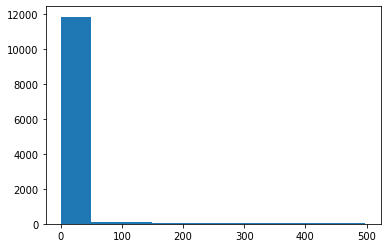

In [24]:
np.max(verify_time)
n, bins, patches = plt.hist(verify_time)
plt.show()

In [12]:
print(n)
print(bins)
print(patches)

[12271.   358.   277.   102.    68.    51.    66.    50.    35.    45.]
[   0.  359.  718. 1077. 1436. 1795. 2154. 2513. 2872. 3231. 3590.]
<a list of 10 Patch objects>


In [21]:
for i, j in df_future.iterrows():
    if abs(j['UnixTime_Future'] - j['UnixTime'] - 60 * 60) >= 500:
        df_future.drop(index = i, inplace = True)